# Options and Derivatives Exercises 

##### Name and Matr. Number
##### Georgi Atanasov 11776393
##### Kirill Gusev 01429691
##### Julius Lang  01615740
##### Kirill Tsatkhlanov 01624965
##### Samoilova Valeriia 12029463
##### Dimitar Yotov      11774035


##### 02.11.2021


## Exercise 1 

In [1]:
import numpy as np        ## we import the needed packages
import sympy as sm
import random
import matplotlib.pyplot as plt

## Exercise 1 $(a)$
<br> $T$-period binomial option pricinf
<br>Stock starts at price $ S $ at time $ t=0$
<br>$ R_{u} > 1 > R_{d}$
<br>Option with strike price $K$

$op_price$ - Function finds the real value of a Option by backwards induction
<br> First finds the numerical value $option price_{num}$ 
<br> Second finds the symbolic value $option price_{symb}$
<br> Price of the Call Option $E(C_{t}) = q*C_{t+1}^{u}+(1-q)*C_{t+1}^{d}$ ,where 
<br> $q = \frac{1-R_{u}}{R_{d}-R_{u}}$

In [2]:
def op_price(Ru,Rd,T,S,K):
    
    
    #Ru- good state
    #Rd- bad state
    #T - periods
    #S _ initial price of the stock
    #K - strike of the option
    
    # We create a dummy matrix with dimensions t+1xt+1
    Opt_mat = np.zeros([T+1,T+1]) 
    
    # We calculate the risk neutral probability
    q = (1-Rd)/(Ru-Rd) 
    
    
    
    """# We use the dummy matrix to create the matrix with Price of stock Ru*Rd*S minus Strike price K for each state of the world o 
    and in each time period t"""
     
    Opt_mat[0,0]=S-K #Period t = 0  - create a matrix for stock prices minus K for each state
    
    for t in range(1,T+1):#t-Period t=(1,T+1) - beginn with 1, cause the above line already fills first entry
        for o in range(t+1):#o - Outcome; Condition on t+1 in order to have triangle matrix 
            Opt_mat[o,t]= Ru**(t-o)*Rd**(o)*S-K
     
    
    """ Since we have this matrix now, we proceed with the backward induction procedure and find the price of the call for every 
    period T and for every scenario. Note that our rows are the different scenarious."""
   
    for t in range(T,-1,-1): 
        for o in range(t,-1,-1): # we adjust the second loop for the itterations. Note that the range is backward -> e.g not 1,2,3 but 3,2,1
            if t == T:
                pass
            else:                                                       # We use the risk-neutral probability to calculate the price
                Opt_mat[o,t] = Opt_mat[o+1,t+1]*(1-q)+Opt_mat[o,t+1]*(q)#Opt_mat[o,t+1]- good state at t+1
                                                                        #Opt_mat[o+1,t+1] - badd state at t+1
            
            if Opt_mat[o,t]<0: #If option value is negative then do not exercise it  
                Opt_mat[o,t] = 0
            
    return Opt_mat
op_price(Ru=1.02,Rd=0.99,S=101,K=100,T=4)



array([[1.60432534, 3.03179171, 5.0804    , 7.182008  , 9.32564816],
       [0.        , 0.89059215, 2.00748756, 4.029596  , 6.11018792],
       [0.        , 0.        , 0.33214445, 0.99643335, 2.98930004],
       [0.        , 0.        , 0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ]])

## Exercise 1 $(b) $

Monte-Carlo Simulation under risk neutral measure:
<br> $q = \frac{1-R_{u}}{R_{d}-R_{u}}$

In [3]:
def Op_path(Ru,Rd,S,K,T):
    
    #Ru- good state
    #Rd- bad state
    #T - periods
    #S _ initial price of the stock
    #K - strike of the option
    
    #We create a dummy variable
    R = 1
    
    # We calculate the risk neutral probobility
    q = (1-Rd)/(Ru-Rd)
    
    """We use the dummy variable to give her a random value of either Ru or Rd and repeat this for T periods so that we get a random scenario"""
    for i in range(T+1): # iterates from one to the value of T
        State = random.choices([Ru,Rd], weights=(q,1-q),k=1)[0]#Random choice of state Ru or Rd ->up or down /q is probability and it keeps the randomness
        R = R*State     #This gives us 1*Rd^()*Ru^()
        
    """Depending on the random scenario we generated, we see the output of the call price"""    
    if R*S-K <= 0: #At maturity date option won't be excercised if the underline price*Return < strike
        return 0
    else:
        return R*S-K #Excercising option
    
        
Op_path(Ru=1.02,Rd=0.99,S=101,K=100,T=4)

1.9594070396000092

In [4]:
N =10000             # we have used N=10000
def MCS_BOP(Ru,Rd,S,K,T,n):    #MCS -Monte carlo simulation BOP - Binominal Option Pricing
    
    """We simulate the process form above N times"""
    #We create a dummy vector with N elements
    l = np.zeros(n)# Vectro where final prices are stored
    
    #We simulate the function op-path n times and store the values in the dummy vector
    for i in range(n):
        l[i] = Op_path(Ru,Rd,S,K,T) # fill for each itteration of the function and take the mean result
        
    # finally the function gives the mean of the newly filled vector
    return np.mean(l)

In [5]:
mean = MCS_BOP(1.02,0.99,101,100,100,N)
mean

6.271933837500123

## Exercise 1 $(c)$

In [6]:
def r_average(Ru,Rd,S,K,T,N):
    
    """We create a function which gives us the running average (meaning the average for ex. 10, 20,30.....N periods)"""
    
    # We create a dummy vectors and a variable
    i = 2
    f = []
    l  = []
    
    # We fill the vectors with the averages of simulations with different i
    while i<N:  #increase the number exponentially to get the prices of our call option 
        l.append(MCS_BOP(Ru,Rd,S,K,T,i))  # Note that N=i
        f.append(i)
        i=i*2
    return l,f


# We name OP the price of a call option taken from our call price option tree we had at E.1 a)
OP = op_price(1.02,0.99,100,101,100)[0][0] # last two digits represent the value of row and collumn of result of first function
print(OP)

6.1726755092044385


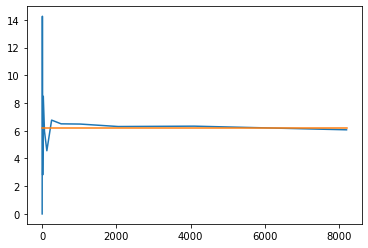

In [7]:
# We now plot the filled vectors, representing our running average and the price OP

l,f = r_average(1.02,0.99,101,100,100,N)
plt.plot(f,l,f,np.repeat(OP,len(f))) # observe convergence 

#We observe that when N increases there is clearly a convergence

In [8]:
#symbolical Option pricing matrix BE CAREFULL WITH BIG T



"""

Redunded





"""
"""Additional solution to the Exercise 1(a); We try to find the price of the option symbolicaly, 
with Condition Ru^(t-o)*Rd^(o)>K> Ru^(t-o+1)*Rd^(o+1)(you need to specifiy the postion of node 
where the following condition is ture: K> Ru^(t-o+1)*Rd^(o+1))"""
Rd, Ru, Kt, S0, C0, C1, C2, D0, N0 = sm.symbols('Rd Ru Kt S0 C0 C1 C2 D0 N0') # Define the variables 
def op_priceM(S,K,T,Ru,Rd,P,D0=D0,N0=N0):
# P - Position of state for wich is K > Ru^(t-o)*Rd^(o)
    if P>=0 and P <= T+1: # P lies between 1 and T
        pass
        """create Outcome matrix, where each entry is the combination of factors Ru^i*Rd^j"""
        Opt_mat = sm.zeros(T+1)
        q = (1-Rd)/(Ru-Rd) 
        Opt_mat[0,0]=1
        for t in range(1,T+1):#t-period t
            for o in range(t+1):#o - Outcome 
                Opt_mat[o,t]= Ru**(t-o)*Rd**(o) 
        """Creat Output matrix; filling it with Option prices """
        for t in range(T,-1,-1): #Backward looping Start with index T and end with 0 
            for o in range(t,-1,-1): 
                if t == T: 
                    if o>P:
                        Opt_mat[o,t] = 0
                    else:    
                        Opt_mat[o,t] = Opt_mat[o,t]*S-K
                else:    
                    Opt_mat[o,t] = Opt_mat[o+1,t+1]*(1-q)+Opt_mat[o,t+1]*(q)
                    Opt_mat[o,t] = sm.simplify(Opt_mat[o,t])
    else:
        print("Postion P must lie between 0 and "+str(T+1))
    
    return Opt_mat
op_priceM(S=S0,K=Kt,T=3,Ru=Ru,Rd=Rd,P=2)



Matrix([
[(Rd - 1)*(-(Kt - Ru*S0)*(Rd - Ru)**2 + (Ru - 1)*((Kt - Rd*Ru*S0)*(Rd - Ru) - (Kt - Rd**2*Ru*S0)*(Ru - 1)))/(Rd - Ru)**3,                                                                      -Kt + Ru*S0,                         -Kt + Ru**2*S0,    -Kt + Ru**3*S0],
[                                                                                                                      0, (Rd - 1)*(-(Kt - Rd*Ru*S0)*(Rd - Ru) + (Kt - Rd**2*Ru*S0)*(Ru - 1))/(Rd - Ru)**2,                         -Kt + Rd*Ru*S0, -Kt + Rd*Ru**2*S0],
[                                                                                                                      0,                                                                                0, -(Kt - Rd**2*Ru*S0)*(Rd - 1)/(Rd - Ru), -Kt + Rd**2*Ru*S0],
[                                                                                                                      0,                                                                              

## Exercise $2$
## <br>  $(a)$

In [9]:
def delta_mat(Ru,Rd,T,S,K):
    """Out_mat - Outcome matrix(Ru^i*Rd^j), Opt_mat - Option pricing matrix, D_mat - Delta matrix"""
    Out_mat, D_mat, N_mat = np.zeros([T+1,T+1]), np.zeros([T+1,T+1]),np.zeros([T+1,T+1])
    Opt_mat = op_price(Ru,Rd,T,S,K)

    """Creating the matrix with outocames Ru^j*Rd^i for each state of the world o and in each time period t"""
    Out_mat[0,0]=S
    for t in range(1,T+1):#t-period t
        for o in range(t+1):#o - Outcome 
            Out_mat[o,t]= Ru**(t-o)*Rd**(o)*S
            
    for t in range(T-1,-1,-1): #Backward induction procedure
        for o in range(t,-1,-1):   
            D_mat[o,t] =  (Opt_mat[o,t+1]-Opt_mat[o+1,t+1])/(Out_mat[o,t+1]-Out_mat[o+1,t+1])  
            N_mat[o,t] = Opt_mat[o,t+1] - D_mat[o,t]*Out_mat[o,t+1]
    return D_mat,N_mat
delta_mat(1.02,0.99,4,101,100)

(array([[0.70666652, 0.99427698, 1.        , 1.        , 0.        ],
        [0.        , 0.55850356, 0.99132876, 1.        , 0.        ],
        [0.        , 0.        , 0.335533  , 0.98686175, 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        , 0.        , 0.        ]]),
 array([[ -69.76899318,  -99.39862281, -100.        , -100.        ,
            0.        ],
        [   0.        ,  -54.95417836,  -99.09793421, -100.        ,
            0.        ],
        [   0.        ,    0.        ,  -32.88230044,  -98.64690132,
            0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ],
        [   0.        ,    0.        ,    0.        ,    0.        ,
            0.        ]]))

## $(b)$

In [10]:
def Stok_price_retrn(Ru,Rd,T,S,K):
    Retr_mat = np.zeros([T+1,T+1])
    Retr_mat[0,0]=S
    for t in range(1,T+1):#t-period t
        for o in range(t+1):#o - Outcome 
            Retr_mat[o,t]= Ru**(t-o)*Rd**(o)
    return Retr_mat

def delta_path(Ru,Rd,S,K,T):
    R = 1
    D_mat = delta_mat(Ru,Rd,T,S,K)[0] #delta matrix from previous exc.
    Opt_mat = op_price(Ru,Rd,T,S,K) # Opt pricing matrix from exc 1A.
    D, Port_V,O_price,S_price = np.zeros(T+1),np.zeros(T+1),np.zeros(T+1),np.zeros(T+1)
    """Setting the intial value at t=0"""
    q = (1-Rd)/(Ru-Rd)
    Retr_mat = np.round(Stok_price_retrn(Ru,Rd,T,S,K),5)
    D[0] = D_mat[0,0]
    Port_V[0]= D[0]*S*R
    O_price[0]= Opt_mat[0,0]
    S_price[0]= R*S
    """Monte-carlo simulation"""
    for i in range(1,T+1): 
            
        State = random.choices([Ru,Rd], weights=(q,1-q),k=1)[0]#Random choice of state Ru or Rd
        R = R*State
        o,t = np.where(Retr_mat == np.round(R,5))#Looking for the indeces in the Outcome matrix with received value
        o,t = int(o),int(t)
        D[i] = D_mat[o,t]
        Port_V[i]= D[o]*S*R
        O_price[i]= Opt_mat[o,t]
        S_price[i]= R*S
    
    D[T] = D_mat[o+1,T-1]*(1-q)+D_mat[o,T-1]*(q)
    if R*S-K <= 0: #At maturity date option won't be excercised if the underline price*Return < strike
        return D,Port_V,O_price,S_price
    else:
        return D,Port_V,O_price,S_price #Excercising option
    
        
delta_path(Ru=1.02,Rd=0.99,S=104,K=100,T=20)

(array([0.76259248, 0.71360696, 0.65796869, 0.59592381, 0.52816841,
        0.45594036, 0.38107853, 0.30602109, 0.23370947, 0.36249381,
        0.27848064, 0.19863742, 0.12778074, 0.23888032, 0.148663  ,
        0.07398177, 0.02296152, 0.06753388, 0.        , 0.        ,
        0.        ]),
 array([79.30961744, 73.4729731 , 67.06701219, 60.13532469, 52.76507258,
        45.09385336, 37.31289885, 29.66409175, 22.42803426, 22.87659495,
        35.12779198, 26.71655538, 18.86608188, 19.24340352, 12.25522854,
        22.68149009, 13.97427578, 14.25376129,  7.0224148 ,  2.15773232,
         6.28280882]),
 array([5.03800786, 4.24491168, 3.51018195, 2.83951183, 2.23815858,
        1.71050786, 1.25956932, 0.88644034, 0.58979942, 1.0383601 ,
        0.68353392, 0.41366973, 0.22310324, 0.4658291 , 0.23440894,
        0.09182884, 0.02158376, 0.06475127, 0.        , 0.        ,
        0.        ]),
 array([104.        , 102.96      , 101.9304    , 100.911096  ,
         99.90198504,  98.9029651

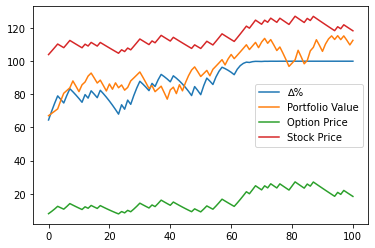

In [11]:
d,V,O,S = delta_path(Ru=1.02,Rd=0.99,S=104,K=100,T=100)
time = np.array(range(len(d)))
plt.plot(time,d*100,label='∆%')
plt.plot(time,V,label='Portfolio Value')
plt.plot(time,O,label='Option Price')
plt.plot(time,S,label='Stock Price')
plt.legend()

## $(c)$

In [12]:
def const_port_path(Ru,Rd,T,S,K):
    Port_V= np.repeat(MCS_BOP(Ru,Rd,S,K,T,1000),T+1)
    R = 1
    D_mat,N_mat = delta_mat(Ru,Rd,T,S,K) #delta matrix from previous exc.
    Opt_mat = op_price(Ru,Rd,T,S,K) # Opt pricing matrix from exc 1A.
    Eq_holding,D,O_price,S_price = np.zeros(T+1),np.zeros(T+1),np.zeros(T+1),np.zeros(T+2)
    q= (1-Rd)/(Ru-Rd)
    """Setting the intial values at t=0"""
    
    Retr_mat = np.round(Stok_price_retrn(Ru,Rd,T,S,K),5)
    D[0] = D_mat[0,0]
    O_price[0]= Opt_mat[0,0]
    S_price[0]= R*S
    """Monte-carlo simulation"""
    for i in range(1,T+1): 
            
        State = random.choices([Ru,Rd], weights=(q,1-q),k=1)[0]#Random choice of state Ru or Rd
        R = R*State
        o,t = np.where(Retr_mat == np.round(R,5))#Looking for the indeces in the Outcome matrix with received value
        o,t = int(o),int(t)
        D[i] = D_mat[o,t]
        O_price[i]= Opt_mat[o,t]
        S_price[i]= R*S
        Eq_holding[i] = (Port_V[i]-N_mat[o,t])/(R*S) # Find the amount that investor holds in equity
 
    return Eq_holding, O_price ,Port_V
const_port_path(Ru=1.02,Rd=0.99,S=104,K=100,T=2)



(array([0.        , 1.01032208, 0.03946577]),
 array([4.    , 2.96  , 1.9304]),
 array([4.02276154, 4.02276154, 4.02276154]))

First Var

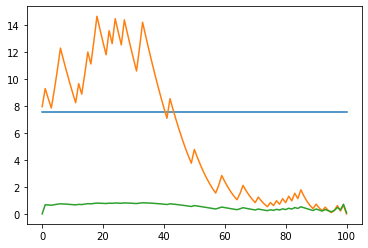

In [13]:
E,O,P=const_port_path(Ru=1.02,Rd=0.99,S=104,K=100,T=100)
time = np.array(range(len(E)))
plt.plot(time,P,label='Portfolio Value')
plt.plot(time,O,label='Option price')
plt.plot(time,E,label='Equity holding')

Second Var

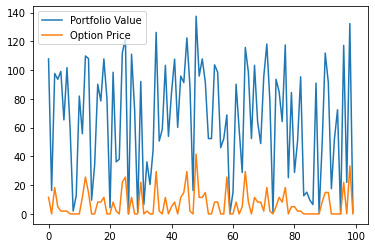

In [14]:
v = []
o = []
for N in range(1,10000,100):
    
    d,V,O,S = delta_path(Ru=1.02,Rd=0.99,S=104,K=100,T=100)
    v.append(V[-1])
    o.append(O[-1])
n = np.array(range(len(v)))
plt.plot(n,v,label='Portfolio Value')
plt.plot(n,o,label='Option Price')
plt.legend()




## $d)$
<br> Firstly, we create the $tracking error()$ function, which finds the Standard deviation and Variance  of the difference between Value of Portfolio and Option Price

In [15]:
def tracking_error(Ru,Rd,T,S,K):
    """Same function as before """
    R = 1
    D_mat = delta_mat(Ru,Rd,T,S,K)[0] #delta matrix from previous exc.
    Opt_mat = op_price(Ru,Rd,T,S,K) # Opt pricing matrix from exc 1A.
    T_Error,D= np.zeros(T+1),np.zeros(T+1)
    """Setting the intial value at t=0"""
    q = (1-Rd)/(Ru-Rd)
    Retr_mat = np.round(Stok_price_retrn(Ru,Rd,T,S,K),5)
    D[0] = D_mat[0,0]
    """Monte-carlo simulation"""
    for i in range(1,T+1): 
            
        State = random.choices([Ru,Rd], weights=(q,1-q),k=1)[0]#Random choice of state Ru or Rd
        R = R*State
        o,t = np.where(Retr_mat == np.round(R,5))#Looking for the indeces in the Outcome matrix with received value
        o,t = int(o),int(t)
        T_Error[i] = D[o]*S*R-Opt_mat[o,t] #tracking error
    
    return np.std(T_Error),np.std(T_Error)**2
   

std ,var =tracking_error(Ru=1.02,Rd=0.99,S=104,K=100,T=100)

Secondly we increase repeat the procedure described above $n$ times, store and plot the $Std$ and $Var$

In [16]:
N =200             # we have used N=1000
def MCS_BOP_STD(Ru,Rd,S,K,T,n):    #MCS -Monte carlo simulation BOP - Binominal Option Pricing
    
    """We simulate the process form above N times"""
    #We create a dummy vector with N elements
    std = np.zeros(n)# Vectro where final prices are stored
    var = np.zeros(n)
    #We simulate the function op-path n times and store the values in the dummy vector
    for i in range(n):
        std[i],var[i] = tracking_error(Ru,Rd,T,S,K) # fill for each itteration of the function and take the mean result
    
    # finally the function gives the mean of the newly filled vector
    return std, var

In [17]:
Variation = MCS_BOP_STD(Ru=1.02,Rd=0.99,S=101,K=100,T=100,n=N)

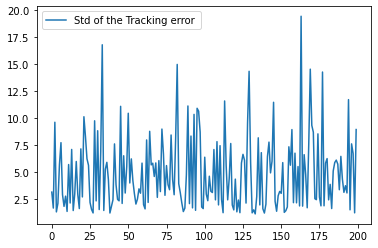

In [18]:
n =  np.array(range(N))
plt.plot(n, Variation[0],label='Std of the Tracking error ')
#plt.plot(n, Variation[1],label='Var of the Tracking error')
plt.legend()